<a href="https://colab.research.google.com/github/Davyeeh/Trabalho-Lab.-CD/blob/main/TrabalhoFinal_LAB_C_D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados originais
link: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey




## Metadados

### Informações do Dataset

Este conjunto de dados é de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de transtornos de saúde mental no local de trabalho tecnológico. Você também é incentivado a analisar os dados da pesquisa em andamento de 2016 encontrada aqui.

### Conteúdo

Este conjunto de dados contém os seguintes dados:

* Timestamp

* Age

* Gender

* Country

* state: Se você mora nos Estados Unidos, em qual estado ou território você mora?

* self_employed: Você trabalha por conta própria?

* family_history: Você tem histórico familiar de doença mental?

* treatment: Você procurou tratamento para um problema de saúde mental?

* work_interfere: Se você tem algum problema de saúde mental, sente que isso interfere no seu trabalho?

* no_employees: Quantos funcionários sua empresa ou organização possui?

* remote_work: Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?

* tech_company: O seu empregador é principalmente uma empresa/organização de tecnologia?

* benefits: Seu empregador oferece benefícios de saúde mental?

* care_options: Você conhece as opções de cuidados de saúde mental que seu empregador oferece?

* wellness_program: Seu empregador já discutiu a saúde mental como parte de um programa de bem-estar para funcionários?

* seek_help: O seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como procurar ajuda?

* anonymity: O seu anonimato está protegido se você optar por aproveitar as vantagens dos recursos de tratamento de saúde mental ou abuso de substâncias?

* leave: É fácil para você tirar licença médica por um problema de saúde mental?

* mental_health_consequence: Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?

* phys_health_consequence: Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?

* coworkers: Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?

* supervisor: Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?

* mental_health_interview: Você abordaria um problema de saúde mental com um potencial empregador em uma entrevista?

* phys_health_interview: Você abordaria um problema de saúde física com um potencial empregador em uma entrevista?

* mental_vs_physical: Você acha que seu empregador leva a saúde mental tão a sério quanto a saúde física?

* obs_consequence: Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental em seu local de trabalho?

* comments: Quaisquer notas ou comentários adicionais

# Importação de bibliotecas necessárias e da base de dados

In [2]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base de dados
dados = pd.read_csv('https://raw.githubusercontent.com/Davyeeh/Trabalho-Lab.-CD./refs/heads/main/survey.csv', sep=',')
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Limpeza do Dataset, padronização e tradução dos dados

## Sobre valores vazios

### Verificação de valores vazios

In [3]:
# Verificação de valores vazios em cada coluna
valores_perdidos = dados.isna().sum()
print('Valores em falta\n')
print(valores_perdidos)
print('='*50)

# Verificação de porcentagem de valores faltantes em cada coluna
perdidos_porcentagem = (dados.isna().sum() / len(dados)) * 100
print('Porcentagem de valores em falta\n')
print(perdidos_porcentagem)
print('='*50)

Valores em falta

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64
Porcentagem de valores em falta

Timestamp         

### Preenchimento de valores vazios

In [4]:
# Preencheendo os valores vazios da coluna 'self_employed' com 'Não informado'
dados['self_employed'] = dados['self_employed'].fillna('Não informado')
print("Coluna 'self_employed'")
print(dados['self_employed'])
print('='*50)

# Os valores vazios na coluna de 'state' representa pessoas que não moram nos Estados Unidos.
dados['state'] = dados['state'].fillna('Não reside nos Estados Unidos')
print("Coluna 'state'")
print(dados['state'])
print('='*50)

# Os valores vazios na coluna de 'work_interfere' são pessoa que não possuem nenhum problema mental.
dados['work_interfere'] = dados['work_interfere'].fillna('Não possui algum problema mental')
print("Coluna 'work_interference'")
print(dados['work_interfere'])
print('='*50)

# E na coluna 'Comments' são pessoas que não possuem comentários a serem adicionados.
dados['comments'] = dados['comments'].fillna('Não possui comentários')
print("Coluna 'comments'")
print(dados['comments'])
print('='*50)

# Verificação dos valores
print('Valores em falta\n')
print(valores_perdidos)


Coluna 'self_employed'
0       Não informado
1       Não informado
2       Não informado
3       Não informado
4       Não informado
            ...      
1254               No
1255               No
1256               No
1257               No
1258               No
Name: self_employed, Length: 1259, dtype: object
Coluna 'state'
0                                  IL
1                                  IN
2       Não reside nos Estados Unidos
3       Não reside nos Estados Unidos
4                                  TX
                    ...              
1254    Não reside nos Estados Unidos
1255                               IL
1256                               CA
1257                               NC
1258                               IL
Name: state, Length: 1259, dtype: object
Coluna 'work_interference'
0                                  Often
1                                 Rarely
2                                 Rarely
3                                  Often
4                    

## Sobre Padronização dos dados

In [5]:
# Varificação de valores únicos em cada coluna
valores_unicos = dados.nunique()
print(valores_unicos)
print('='*50)

# Padronização de 'Gender'
print(dados['Gender'].unique())
genero_padrão = {
    'M': 'Male',
    'm': 'Male',
    'male':'Male',
    'Male-ish': 'Male',
    'Mal': 'Male',
    'Cis Male': 'Male',
    'cis male': 'Male',
    'Male (CIS)': 'Male',
    'Make': 'Male',
    'Guy (-ish) ^_^': 'Male',
    'maile': 'Male',
    'male leaning androgynous': 'Male',
    'Male ': 'Male',
    'Man': 'Male',
    'Mail': 'Male',
    'Malr': 'Male',
    'ostensibly male, unsure what that really means': 'Male',
    'Cis Man': 'Male',
    'something kinda male?': 'Male',
    'msle': 'Male',
    'female': 'Female',
    'Cis Female': 'Female',
    'F': 'Female',
    'Trans woman': 'Female',
    'Trans-female': 'Female',
    'Female (trans)': 'Female',
    'Femake': 'Female',
    'woman': 'Female',
    'Woman': 'Female',
    'f': 'Female',
    'Female ': 'Female',
    'Female (cis)': 'Female',
    'cis-female/femme': 'Female',
    'femail': 'Female',
    'queer': 'Queer',
    'queer/she/they': 'Queer',
    'Genderqueer': 'Queer',
    'non-binary': 'Non-binary',
    'Enby': 'Non-binary',
    'fluid': 'Fluid',
    'Neuter': 'Agender',
    'A little about you': 'Não informado',
    'Nah': 'Não informado',
    'p': 'Não informado'
}
dados['Gender'] = dados['Gender'].map(lambda x: genero_padrão.get(x, x))
print(dados['Gender'].unique())
print('='*50)

# Padronização da coluna 'state'
print(dados['state'].unique())
us_state_to_abbrev = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "PR": "Puerto Rico",
    "VI": "Virgin Islands",
    "GU": "Guam",
    "MP": "Northern Mariana Islands",
    "AS": "American Samoa",
    "FSM": "Federated States of Micronesia",
    "UM": "United States Minor Outlying Islands",
}
dados['state'] = dados['state'].map(lambda x: us_state_to_abbrev.get(x, x))
print(dados['state'].unique())

'''
As demais colunas não precisam de padronização pois são perguntas de 'sim', 'não', 'talvez' ou 'não informado'.
'''


Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          46
self_employed                   3
family_history                  2
treatment                       2
work_interfere                  5
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      161
dtype: int64
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-fe

"\nAs demais colunas não precisam de padronização pois são perguntas de 'sim', 'não', 'talvez' ou 'não informado'.\n"

## Sobre a tradução dos dados

### Tradução das colunas




In [6]:
# Traduçao das colunas para melhor entendimento dos dados
traducao_colunas = {
    'Timestamp': 'Carimbo_de_data_hora',
    'Age': 'Idade',
    'Gender': 'Genero',
    'Country': 'Pais',
    'state': 'Estado',
    'self_employed': 'Trabalhador_autonomo',
    'family_history': 'Historico_familiar',
    'treatment': 'Tratamento',
    'work_interfere': 'Interfere_no_trabalho',
    'no_employees': 'Numero_de_empregados',
    'remote_work': 'Trabalho_remoto',
    'tech_company': 'Empresa_de_tecnologia',
    'benefits': 'Beneficios',
    'care_options': 'Opcoes_de_cuidado',
    'wellness_program': 'Programa_de_bem_estar',
    'seek_help': 'Procurar_ajuda',
    'anonymity': 'Anonimato',
    'leave': 'Licenca',
    'mental_health_consequence': 'Consequencia_saude_mental',
    'phys_health_consequence': 'Consequencia_saude_fisica',
    'coworkers': 'Colegas_de_trabalho',
    'supervisor': 'Supervisor',
    'mental_health_interview': 'Entrevista_saude_mental',
    'phys_health_interview': 'Entrevista_saude_fisica',
    'mental_vs_physical': 'Mental_vs_fisica',
    'obs_consequence': 'Consequencia_observada',
    'comments': 'Comentarios'
}

dados = dados.rename(columns=traducao_colunas)
print(dados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Carimbo_de_data_hora       1259 non-null   object
 1   Idade                      1259 non-null   int64 
 2   Genero                     1259 non-null   object
 3   Pais                       1259 non-null   object
 4   Estado                     1259 non-null   object
 5   Trabalhador_autonomo       1259 non-null   object
 6   Historico_familiar         1259 non-null   object
 7   Tratamento                 1259 non-null   object
 8   Interfere_no_trabalho      1259 non-null   object
 9   Numero_de_empregados       1259 non-null   object
 10  Trabalho_remoto            1259 non-null   object
 11  Empresa_de_tecnologia      1259 non-null   object
 12  Beneficios                 1259 non-null   object
 13  Opcoes_de_cuidado          1259 non-null   object
 14  Programa

### Tradução das linhas

In [7]:
# Tradução das tuplas

# Tradução de Genero
print('Tradução de Genero')
print(dados['Genero'].unique())
traducao_genero = {
    'Female': 'Feminino',
    'Male': 'Masculino',
    'Non-binary': 'Não binário',
    'All': 'Todos',
    'Fluid': 'Fluido',
    'Androgyne': 'Andrógino',
    'Agender': 'Agênero'

}
dados['Genero'] = dados['Genero'].map(lambda x: traducao_genero.get(x, x))
print(dados['Genero'].unique())
print('='*50)

# Tradução de País
print('Tradução de País')
paises_unicos = dados['Pais'].unique()
print(paises_unicos)

traducao_paises = {'United States': 'Estados Unidos',
                   'Canada': 'Canadá',
                   'United Kingdom': 'Reino Unido',
                   'Bulgaria': 'Bulgária',
                   'France': 'França',
                   'Portugal': 'Portugal',
                   'Netherlands': 'Holanda',
                   'Switzerland': 'Suíça',
                   'Poland': 'Polônia',
                   'Australia': 'Austrália',
                   'Germany': 'Alemanha',
                   'Russia': 'Rússia',
                   'Mexico': 'México',
                   'Brazil': 'Brasil',
                   'Slovenia': 'Eslovênia',
                   'Costa Rica': 'Costa Rica',
                   'Austria': 'Áustria',
                   'Ireland': 'Irlanda',
                   'India': 'Índia',
                   'South Africa': 'África do Sul',
                   'Italy': 'Itália',
                   'Sweden': 'Suécia',
                   'Colombia': 'Colômbia',
                   'Latvia': 'Letônia',
                   'Romania': 'Romênia',
                   'Belgium': 'Bélgica',
                   'New Zealand': 'Nova Zelândia',
                   'Zimbabwe': 'Zimbábue',
                   'Spain': 'Espanha',
                   'Finland': 'Finlândia',
                   'Uruguay': 'Uruguai',
                   'Israel': 'Isrrael',
                   'Bosnia and Herzegovina': 'Bósnia e Herzegovina',
                   'Hungary': 'Hungria',
                   'Singapore': 'Cingapura',
                   'Japan': 'Japão',
                   'Nigeria': 'Nigéria',
                   'Croatia': 'Croácia',
                   'Norway': 'Noruega',
                   'Thailand': 'Tailândia',
                   'Denmark': 'Dinamarca',
                   'Bahamas, The': 'Bahamas',
                   'Greece': 'Grécia',
                   'Moldova': 'Moldávia',
                   'Georgia': 'Geórgia',
                   'China': 'China',
                   'Czech Republic': 'República Tcheca',
                   'Philippines': 'Filipinas'
                   }
dados['Pais'] = dados['Pais'].map(lambda x: traducao_paises.get(x, x))
print(dados['Pais'].unique())
print('='*50)

# Tradução pra linhas de resposta sim, não, talvez, etc
traducao_sim_ou_não = {
    'Yes': 'Sim',
    'No': 'Não',
    'Not sure': 'Não tenho certeza',
    "Don't know": 'Não sei',
    'Maybe': "Talvez",
    'Some of them': 'Alguns deles'
    }
# Trabalhador_autonomo
print('Tradução de Trabalhador_autonomo')

print(dados['Trabalhador_autonomo'].unique())
dados['Trabalhador_autonomo'] = dados['Trabalhador_autonomo'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Trabalhador_autonomo'].unique())
print('='*50)

# Historico_familiar
print('TRadução de historico_familiar')

print(dados['Historico_familiar'].unique())
dados['Historico_familiar'] = dados['Historico_familiar'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Historico_familiar'].unique())
print('='*50)

# Tratamento
print('Tradução de Tratamento')

print(dados['Tratamento'].unique())
dados['Tratamento'] = dados['Tratamento'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Tratamento'].unique())
print('='*50)

# Interfere_no_trabalho
print("Tradução de Intefere_no_trabalho")

print(dados['Interfere_no_trabalho'].unique())
traducao_interfere = {
    'Often': 'Muito',
    'Rarely': 'Raramente',
    'Sometimes': 'Quase sempre',
    'Never': 'Nunca'
}
dados['Interfere_no_trabalho'] = dados['Interfere_no_trabalho'].map(lambda x: traducao_interfere.get(x, x))
print(dados['Interfere_no_trabalho'].unique())
print('='*50)

# Numero_de_empregados
print('Tradução de NUmro_de_empregados')

print(dados['Numero_de_empregados'].unique())
traducao_empregados = {
    'More than 1000' : 'Mais de 1000'
}
dados['Numero_de_empregados'] = dados['Numero_de_empregados'].map(lambda x: traducao_empregados.get(x, x))
print(dados['Numero_de_empregados'].unique())
print('='*50)

# Trabalho_remoto
print('Traduçao de trabalho_remoto')

print(dados['Trabalho_remoto'].unique())
dados['Trabalho_remoto'] = dados['Trabalho_remoto'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Trabalho_remoto'].unique())
print('='*50)

# Tradução Empresa_de_tecnologia
print('Tradução de Empresa_de_tecnologia')
print(dados['Empresa_de_tecnologia'].unique())
dados['Empresa_de_tecnologia'] = dados['Empresa_de_tecnologia'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Empresa_de_tecnologia'].unique())
print('='*50)

# Traduçao de Benefícios
print('Tradução de Beneficios')

print(dados['Beneficios'].unique())
dados['Beneficios'] = dados['Beneficios'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Beneficios'].unique())
print('='*50)

# Tradução de Opcoes_de_cuidado
print('Tradução de opcoes_de_cuidado')

print(dados['Opcoes_de_cuidado'].unique())
dados['Opcoes_de_cuidado'] = dados['Opcoes_de_cuidado'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Opcoes_de_cuidado'].unique())
print('='*50)

# Tradução de Programa_de_bem_estar
print('Tradução de programa_de_bem_estar')

print(dados['Programa_de_bem_estar'].unique())
dados['Programa_de_bem_estar'] = dados['Programa_de_bem_estar'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Programa_de_bem_estar'].unique())
print('='*50)

# Tradução de Procurar_ajuda
print('Tradução de Procurar_ajuda')

print(dados['Procurar_ajuda'].unique())
dados['Procurar_ajuda'] = dados['Procurar_ajuda'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Procurar_ajuda'].unique())
print('='*50)

# Tradução de Anonimato
print('Tradução de Anonimato')

print(dados['Anonimato'].unique())
dados['Anonimato'] = dados['Anonimato'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Anonimato'].unique())
print('='*50)

# TRadução de Licenca
print('Tradução de Licenca')

print(dados['Licenca'].unique())
traducao_licensa = {
    'Somewhat easy': "Um pouco fácil",
    "Don't know": "Não sei",
    'Somewhat difficult': "Um pouco difícil",
    'Very difficult': "Muito difícil",
    'Very easy': "Muito fácil"
}
dados['Licenca'] = dados['Licenca'].map(lambda x: traducao_licensa.get(x, x))
print(dados['Licenca'].unique())
print('='*50)

# tradução de Consequencia_saude_mental
print("Tradução Consequencia_saude_mental")

print(dados['Consequencia_saude_mental'].unique())
dados['Consequencia_saude_mental'] = dados['Consequencia_saude_mental'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Consequencia_saude_mental'].unique())
print('='*50)

# Tradução de Consequencia_saude_fisica
print("Tradução Consequencia_saude_fisica")
print(dados['Consequencia_saude_fisica'].unique())
dados['Consequencia_saude_fisica'] = dados['Consequencia_saude_fisica'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Consequencia_saude_fisica'].unique())
print('='*50)

# Tradução de Colegas_de_trabalho
print("Tradução Colegas_de_trabalho")
print(dados['Colegas_de_trabalho'].unique())
dados['Colegas_de_trabalho'] = dados['Colegas_de_trabalho'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Colegas_de_trabalho'].unique())
print('='*50)

# Tradução de Supervisor
print("Tradução Supervisor")
print(dados['Supervisor'].unique())
dados['Supervisor'] = dados['Supervisor'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Supervisor'].unique())
print('='*50)

# Tradução de Entrevista_saude_mental
print("Tradução Entrevista_saude_mental")
print(dados['Entrevista_saude_mental'].unique())
dados['Entrevista_saude_mental'] = dados['Entrevista_saude_mental'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Entrevista_saude_mental'].unique())
print('='*50)

# Tradução de Entrevista_saude_fisica
print("Tradução Entrevista_saude_fisica")
print(dados['Entrevista_saude_fisica'].unique())
dados['Entrevista_saude_fisica'] = dados['Entrevista_saude_fisica'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Entrevista_saude_fisica'].unique())
print('='*50)

# Tradução de Mental_vs_fisica
print("Tradução Mental_vs_fisica")
print(dados['Mental_vs_fisica'].unique())
dados['Mental_vs_fisica'] = dados['Mental_vs_fisica'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Mental_vs_fisica'].unique())
print('='*50)

# Tradução de Consequencia_observada
print("Tradução Consequencia_observada")
print(dados['Consequencia_observada'].unique())
dados['Consequencia_observada'] = dados['Consequencia_observada'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Consequencia_observada'].unique())
print('='*50)

# Dados traduzidos
dados.info()

Tradução de Genero
['Female' 'Male' 'Queer' 'Non-binary' 'Não informado' 'All' 'Fluid'
 'Androgyne' 'Agender']
['Feminino' 'Masculino' 'Queer' 'Não binário' 'Não informado' 'Todos'
 'Fluido' 'Andrógino' 'Agênero']
Tradução de País
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']
['Estados Unidos' 'Canadá' 'Reino Unido' 'Bulgária' 'França' 'Portugal'
 'Holanda' 'Suíça' 'Polônia' 'Austrália' 'Alemanha' 'Rússia' 'México'
 'Brasil' 'Eslovênia' 'Costa Rica' 'Áustria' 'Irlanda' 'Índia'
 'África do Sul' 'Itál

## Removendo dados aberrantes da coluna 'Idade'

In [9]:
# Verificando mínimo e máximo da coluna 'Idade'
print(dados['Idade'].unique())
print(dados['Idade'].describe())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Idade, dtype: float64


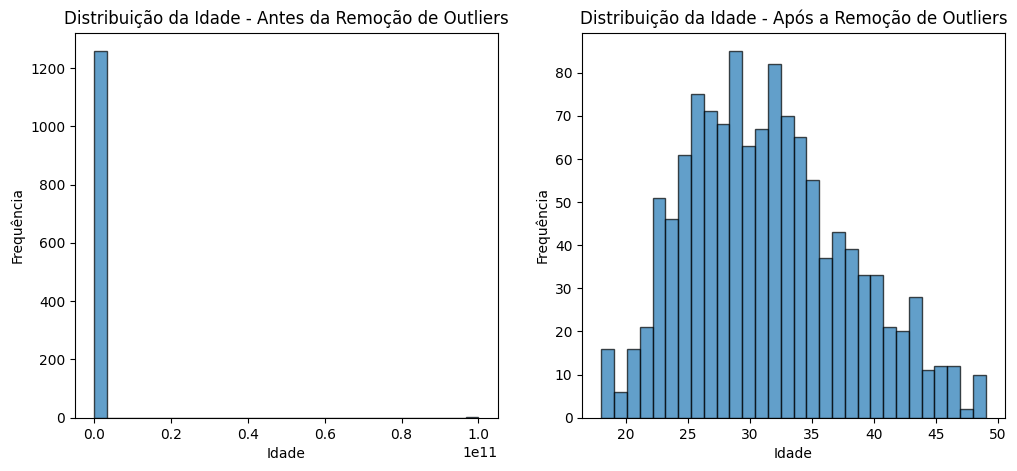

(1259, 1219)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular os quartis e o IQR
Q1 = dados["Idade"].quantile(0.25)
Q3 = dados["Idade"].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para detecção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados removendo os outliers
dados_sem_outliers = dados[
    (dados["Idade"] >= limite_inferior) & (dados["Idade"] <= limite_superior)
]

# Plotar a distribuição antes e depois
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Antes da remoção
ax[0].hist(dados["Idade"], bins=30, edgecolor="black", alpha=0.7)
ax[0].set_title("Distribuição da Idade - Antes da Remoção de Outliers")
ax[0].set_xlabel("Idade")
ax[0].set_ylabel("Frequência")

# Depois da remoção
ax[1].hist(dados_sem_outliers["Idade"], bins=30, edgecolor="black", alpha=0.7)
ax[1].set_title("Distribuição da Idade - Após a Remoção de Outliers")
ax[1].set_xlabel("Idade")
ax[1].set_ylabel("Frequência")

plt.show()

# Quantidade de registros antes e depois
dados.shape[0],dados_sem_outliers.shape[0]


## Dataset pós tratamento


In [12]:
dados_atulizados = dados.copy()
dados_atulizados.to_csv('dados_tratados.csv', index=False, encoding='utf-8')

# Dados atualizados
link: https://raw.githubusercontent.com/Davyeeh/Trabalho-Lab.-CD/refs/heads/main/dados_tratados.csv


## Metadados



### Informações do Dataset

Este conjunto de dados é de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de transtornos de saúde mental no local de trabalho tecnológico. Você também é incentivado a analisar os dados da pesquisa em andamento de 2016 encontrada aqui.

### Conteúdo

Este conjunto de dados contém os seguintes dados:

* Carimbo_de_data_hora
* Idade
* Genero
* Pais
* Estado: Se você mora nos Estados Unidos, em qual estado ou território você mora?
* Trabalhador_autonomo: Você trabalha por conta própria?
* Historico_familiar: Você tem histórico familiar de doença mental?
* Tratamento: Você procurou tratamento para um problema de saúde mental?
* Interfere_no_trabalho: Se você tem algum problema de saúde mental, sente que isso interfere no seu trabalho?
* Numero_de_empregados: Quantos funcionários sua empresa ou organização possui?
* Trabalho_remoto:  Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?
* Empresa_de_tecnologia: O seu empregador é principalmente uma empresa/organização de tecnologia?
* Beneficios: Seu empregador oferece benefícios de saúde mental?
* Opcoes_de_cuidado: Você conhece as opções de cuidados de saúde mental que seu empregador oferece?
* Programa_de_bem_estar: Seu empregador já discutiu a saúde mental como parte de um programa de bem-estar para funcionários?
* Procurar_ajuda: O seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como procurar ajuda?
* Anonimato: O seu anonimato está protegido se você optar por aproveitar as vantagens dos recursos de tratamento de saúde mental ou abuso de substâncias?
* Licenca: É fácil para você tirar licença médica por um problema de saúde mental?
* Consequencia_saude_mental: Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?
* Consequencia_saude_fisica: Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?
* Colegas_de_trabalho: Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?
* Supervisor: Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?
* Entrevista_saude_mental: Você abordaria um problema de saúde mental com um potencial empregador em uma entrevista?
* Entrevista_saude_fisica: Você abordaria um problema de saúde física com um potencial empregador em uma entrevista?
* Mental_vs_fisica: Você acha que seu empregador leva a saúde mental tão a sério quanto a saúde física?
* Consequencia_observada: Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental em seu local de trabalho?
* Comentarios: Quaisquer notas ou comentários adicionais